# 2nd Notebook for Machine Learning Intro Lecture

## 1. One vs. all via logistic Regression

Logistic Regression can only do binary classification - what should we do if we have more than 2 classes?

First, simple approach is __one vs. all regression__: change labels in data to _virginica_ and _other_ to create a binary classification task. 

We do this for all of the three classes in iris and check the predictions on one example flower:

In [133]:
data(iris)
set.seed(1327)

# ID for the example flower
exid = 101
example = iris[exid, ]
print(example)

    Sepal.Length Sepal.Width Petal.Length Petal.Width   Species
101          6.3         3.3            6         2.5 virginica


In [27]:
################# virginica vs. all

irisTrainvirginica = iris[-exid, ]
levels(irisTrainvirginica$Species) = c(levels(irisTrainvirginica$Species), "other")
irisTrainvirginica$Species = ifelse(irisTrainvirginica$Species == "virginica", "virginica", "other")
levels(irisTrainvirginica$Species) = c("virginica", "other")

head(irisTrainvirginica)

################# setosa vs. all

irisTrainsetosa = iris[ -exid, ]
levels(irisTrainsetosa$Species) = c(levels(irisTrainsetosa$Species), "other")
irisTrainsetosa$Species = ifelse(irisTrainsetosa$Species == "setosa", "setosa", "other")
levels(irisTrainsetosa$Species) = c("setosa", "other")

################# versicolor vs. all

irisTrainversicolor = iris[ -exid, ]
levels(irisTrainversicolor$Species) = c(levels(irisTrainversicolor$Species), "other")
irisTrainversicolor$Species = ifelse(irisTrainversicolor$Species == "versicolor", "versicolor", "other")
levels(irisTrainversicolor$Species) = c("versicolor", "other")

Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
5.1,3.5,1.4,0.2,other
4.9,3.0,1.4,0.2,other
4.7,3.2,1.3,0.2,other
4.6,3.1,1.5,0.2,other
5.0,3.6,1.4,0.2,other
5.4,3.9,1.7,0.4,other


fit a logistic regression models on the task:

In [28]:
############### Models

library(mlr)
virginicaTask = makeClassifTask(data = irisTrainvirginica, target = "Species")
virginicaLearner = makeLearner("classif.logreg", predict.type = "prob")
virginicaModel = train(learner = virginicaLearner, task = virginicaTask)
virginicaPred = predict(virginicaModel, newdata = example[, -5])

setosaTask = makeClassifTask(data = irisTrainsetosa, target = "Species")
setosaLearner = makeLearner("classif.logreg", predict.type = "prob")
setosaModel = train(learner = setosaLearner, task = setosaTask)
setosaPred = predict(setosaModel, newdata = example[, -5])

versicolorTask = makeClassifTask(data = irisTrainversicolor, target = "Species")
versicolorLearner = makeLearner("classif.logreg", predict.type = "prob")
versicolorModel = train(learner = versicolorLearner, task = versicolorTask)
versicolorPred = predict(versicolorModel, newdata = example[, -5])

Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”Warning message:
“glm.fit: algorithm did not converge”Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”

Check the predictions

In [29]:
# check predictions
versicolorPred$data
setosaPred$data
virginicaPred$data

,prob.other,prob.versicolor,response
101,0.9181515,0.08184852,other


,prob.other,prob.setosa,response
101,1,2.220446e-16,other


,prob.other,prob.virginica,response
101,2.585234e-10,1,virginica


plot of the  decision boundary that the model learned for the virginica model. Remember that this plot is created using train data only

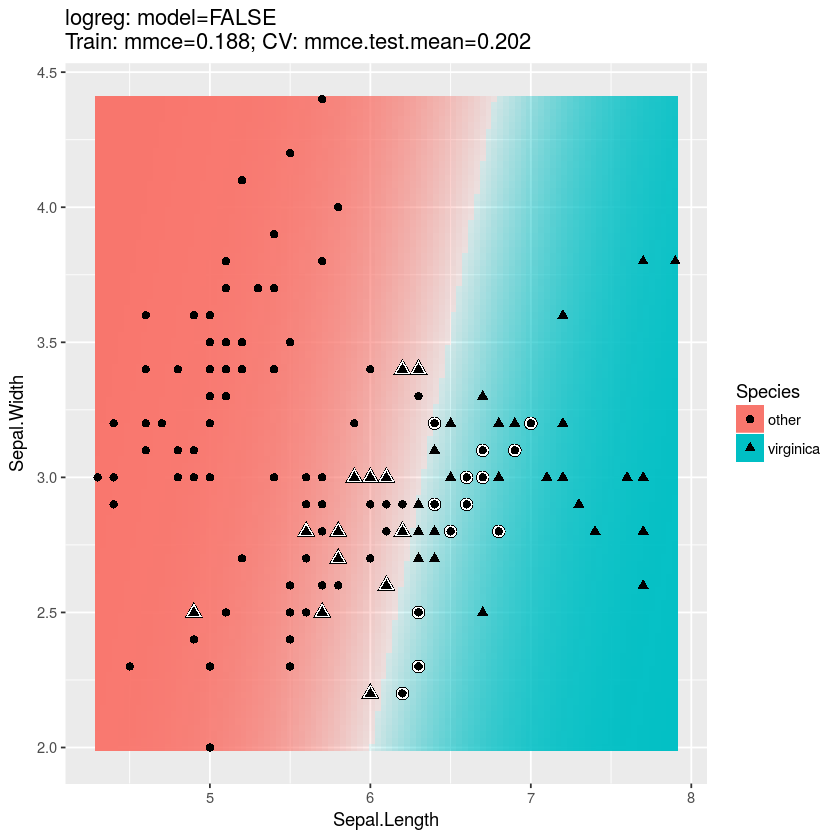

In [30]:
plotLearnerPrediction(virginicaLearner, virginicaTask)

## 2. Multi-class via Softmax Regression

A more elaborate way is to use a Softmax Regression that is able to classify multiple classes via the formula:

$$
\pi_k(x) = P(y = k | x) = \frac{\exp(\theta_k^Tx)}{\sum_{j=1}^g\exp(\theta_j^Tx)}.
$$

Apply this to the same iris problem and test it on the example flower:

In [31]:
data(iris)
set.seed(1327)
trainSize = 3/4
trainIndices = sample(x = seq(1, nrow(iris), by = 1), size = ceiling(trainSize * nrow(iris)), replace = FALSE)

irisTrain = iris[ -exid, ]
irisTest = example
head(irisTrain)


Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
5.1,3.5,1.4,0.2,setosa
4.9,3.0,1.4,0.2,setosa
4.7,3.2,1.3,0.2,setosa
4.6,3.1,1.5,0.2,setosa
5.0,3.6,1.4,0.2,setosa
5.4,3.9,1.7,0.4,setosa


In [41]:
irisTask = makeClassifTask(data = irisTrain, target = "Species")
irisLearner = makeLearner("classif.multinom")
irisModel = train(learner = irisLearner, task = irisTask)
irisPred = predict(irisModel, newdata = irisTest[, -5])



# weights:  18 (10 variable)
initial  value 163.693231 
iter  10 value 16.069943
iter  20 value 7.003845
iter  30 value 6.313575
iter  40 value 5.988443
iter  50 value 5.970189
iter  60 value 5.952918
iter  70 value 5.950034
iter  80 value 5.949348
final  value 5.949274 
converged


In [42]:
print(irisPred)

Prediction: 1 observations
predict.type: response
threshold: 
time: 0.00
     response
101 virginica


and plot the decision boundaries

# weights:  12 (6 variable)
initial  value 163.693231 
iter  10 value 62.413109
iter  20 value 58.224176
iter  30 value 56.607589
iter  40 value 55.844276
iter  50 value 55.088438
final  value 55.064709 
converged
# weights:  12 (6 variable)
initial  value 148.312659 
iter  10 value 56.458362
iter  20 value 54.333975
iter  30 value 50.176074
iter  40 value 50.096426
iter  50 value 50.031910
iter  60 value 49.970584
iter  70 value 49.943009
iter  80 value 49.907483
iter  90 value 49.884638
iter 100 value 49.877439
final  value 49.877439 
stopped after 100 iterations
# weights:  12 (6 variable)
initial  value 147.214047 
iter  10 value 58.129922
iter  20 value 54.185385
iter  30 value 52.771333
iter  40 value 52.149963
iter  50 value 51.658410
iter  60 value 51.558069
iter  70 value 51.413954
iter  80 value 51.163024
iter  90 value 51.149605
iter 100 value 51.120824
final  value 51.120824 
stopped after 100 iterations
# weights:  12 (6 variable)
initial  value 147.214047 
iter  10 value 

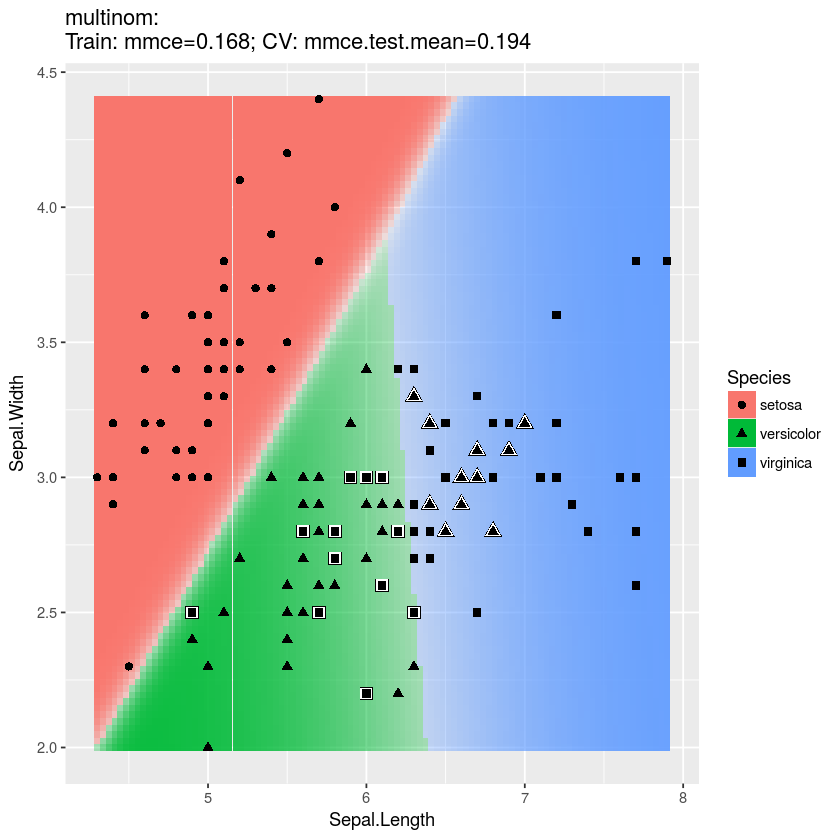

In [43]:
pp = plotLearnerPrediction(irisLearner, irisTask)
pp

# 3.  Quadratic Discriminant Analysis

- In QDA, we caclulate the posteriori class probabilities like that:
$$
p(y = k | X) = \pi_k |\Sigma_k|^{-\frac{1}{2}}\exp(- \frac{1}{2} x^T\Sigma_k^{-1}x - \frac{1}{2} \mu_k^T \Sigma_k^{-1} \mu_k + x^T \Sigma_k^{-1} \mu_k 
$$
* thus, we need those three ingredients for each of the $j = 1, ..., k$ classes:

    * $\hat{\pi}_j = \frac{n_j}{n}$ 
    * $\hat{\mu}_j = \sum_{i: y_i = j} \frac{x_i}{n_j}$  
    * $\hat{\Sigma_j} = \frac{1}{n_j - 1} \sum_{i: y_i = j} (x_i - \hat{\mu}_j) (x_i - \hat{\mu}_j)^T $  


### Implementation

Function to train the QDA model.

Q: how to complete the mu.j = ... line?

In [11]:
trainQDA = function(target, data) {
  
  n = nrow(data)
  # which classes do we have?
  classes = levels(data[, target])
  target.col = which(colnames(data) == target)
  
  # over how many target classes do we iterate=
  k = length(classes)
  
  # initilialize empty storage list
  storage = rep(list(0), k)
  
  # calculate ingredients for each class
  for(j in 1:k) {
    
    class.j = classes[j]
    n.class = length(which(data[,target] == class.j))
    
    # prior
    prior.j = n.class / n
    
    # mu vector
    X.j = data[which(data[ ,target] == class.j), - (which(colnames(data) == target))]
    ### QUESTION ARSNOVA
    # mu.j = ???
    
    # covariance matrix
    cov.j = cov(X.j)
    
    # store results in nested list
    storage.j = rep(list(0), 4)
    storage.j[[1]] = class.j
    storage.j[[2]] = prior.j
    storage.j[[3]] = mu.j
    storage.j[[4]] = cov.j
    storage[[j]] = storage.j
  }
  return(storage)
}

Function to predict on a trained QDA model

In [12]:
predictQDA = function(model, data, out.mode = "probs") {
  
  # get info from model, purrr packages helps in data wrangling tasks
  classes = unlist(purrr::map(model, 1))
  p = length(unlist(model[[1]][3]))
  k = length(classes)
  
  # stupid re-transpose to stick better with lecture
  data = t(data)
  
  # calculate probabilities for each possible class
  storage = cbind(classes, rep(0, k))
  colnames(storage) = c("class", "posteriori")
  for (j in 1:k) {
    
    # retrieve the three ingredients from the trained model
    priori.j = unlist(model[[j]][2])
    mu.j = matrix(unlist(model[[j]][3]))
    cov.j = matrix(unlist(model[[j]][4]), nrow = p)
    
    # invert covariance matrix only once
    inv.cov.j = solve(cov.j)
    # compute posteriori like in lecture
    posteriori.j = priori.j * det(cov.j)^(-0.5) * 
      exp(-0.5 * t(data) %*% inv.cov.j %*% data - 0.5 * t(mu.j) %*% inv.cov.j %*% mu.j + t(data) %*% inv.cov.j %*% mu.j)
    
    # smart and elegant way
    #TODO: discuss w/ Christoph
    # dmnorm(t(data), mean = t(mu.j), varcov = cov.j*priori.j)
    
    storage[j, 2] = posteriori.j
  }
  # normalize to [0, 1] and round to 5 decimals
  storage[, 2] = round(as.numeric(storage[, 2])/ sum(as.numeric(storage[, 2])), 5)
  
  # return major class or probability scores
  if (out.mode == "category") {
    return(storage[which(storage[, 2] == max(storage[, 2])), 1])
  } else if (out.mode == "probs") {
    return(storage)
  }
}



### Evaluation

Train and test on good old iris data set

In [13]:
data(iris)
set.seed(1327)
trainSize = 3/5
trainIndices = sample(x = seq(1, nrow(iris), by = 1), size = ceiling(trainSize * nrow(iris)), replace = FALSE)
irisTrain = iris[ trainIndices, ]
irisTest = iris[ -trainIndices, ]

In [14]:
# train
model = trainQDA(target = "Species", data = irisTrain)
# predict on one observation
testPred = predictQDA(model = model, data = irisTrain[2, 1:4], out.mode = "probs")


In [15]:
# Evaluate performance on test set
# strange thing with the t(x), check that again
testPreds = apply(irisTest[, 1:4], MARGIN = 1 , 
                  function(x) predictQDA(model = model, data = t(x), out.mode = "category"))

results = data.frame(cbind(as.character(irisTest[, 5]), testPreds))
colnames(results) = c("true", "prediction")                      
print(table(results))
print(paste0("mmce: ", length(which(results$true != results$prediction)) / nrow(results)))
                      

            prediction
true         setosa versicolor virginica
  setosa         20          0         0
  versicolor      0         15         8
  virginica       0          0        17
[1] "mmce: 0.133333333333333"


# 4. naive Spam Filter



### Theory

Remember the naive Bayes formula for the posteriori probabilities from the lecture:

$$
\pi_k(x) = \pi_k \prod_{j = 1}^p p(x_j | y = k)
$$

Thus, we need two ingredients to calculate the class-wise posteriori probabilities:

1. prioris: $p(y = k) = \pi_k = \frac{n_k}{n}$
2. conditional probabilities for all classes $k$ and features $j$:  $p(x_j|y = k)$

We use this to implement a rudimentary spam-detector!

### Implementation

#### Data

In [100]:
library(tm)
# train data
spam = c("buy drugs online from our pharma",
  "buy insurance at low prices now", 
  "viagra pharma at low prices sale")#, 
  #"buy best viagra for little money", 
  #"please send me money to cambodja")

ham = c("I was writing for statistics advice",
  "newsletter from your favourite statistics blog",
  "good article on statistics applications", 
  "follow up on your statistics newsletter", 
  "I read the advice on your blog")

all = c(spam, ham)
# convert to word vcorpi
corpusAll = tm::VCorpus(tm::VectorSource(all))
corpusHam = tm::VCorpus(tm::VectorSource(ham))
corpusSpam = tm::VCorpus(tm::VectorSource(spam))

# compute term document matrix
DTM = tm::DocumentTermMatrix(corpusAll)
(wordMatrix = as.data.frame(as.matrix(DTM)))
spamMatrix = wordMatrix[1:length(spam), ]
hamMatrix = wordMatrix[(length(spam) + 1):length(all), ]


advice,applications,article,blog,buy,drugs,favourite,follow,for,from,⋯,pharma,prices,read,sale,statistics,the,viagra,was,writing,your
0,0,0,0,1,1,0,0,0,1,⋯,1,0,0,0,0,0,0,0,0,0
0,0,0,0,1,0,0,0,0,0,⋯,0,1,0,0,0,0,0,0,0,0
0,0,0,0,0,0,0,0,0,0,⋯,1,1,0,1,0,0,1,0,0,0
1,0,0,0,0,0,0,0,1,0,⋯,0,0,0,0,1,0,0,1,1,0
0,0,0,1,0,0,1,0,0,1,⋯,0,0,0,0,1,0,0,0,0,1
0,1,1,0,0,0,0,0,0,0,⋯,0,0,0,0,1,0,0,0,0,0
0,0,0,0,0,0,0,1,0,0,⋯,0,0,0,0,1,0,0,0,0,1
1,0,0,1,0,0,0,0,0,0,⋯,0,0,1,0,0,1,0,0,0,1


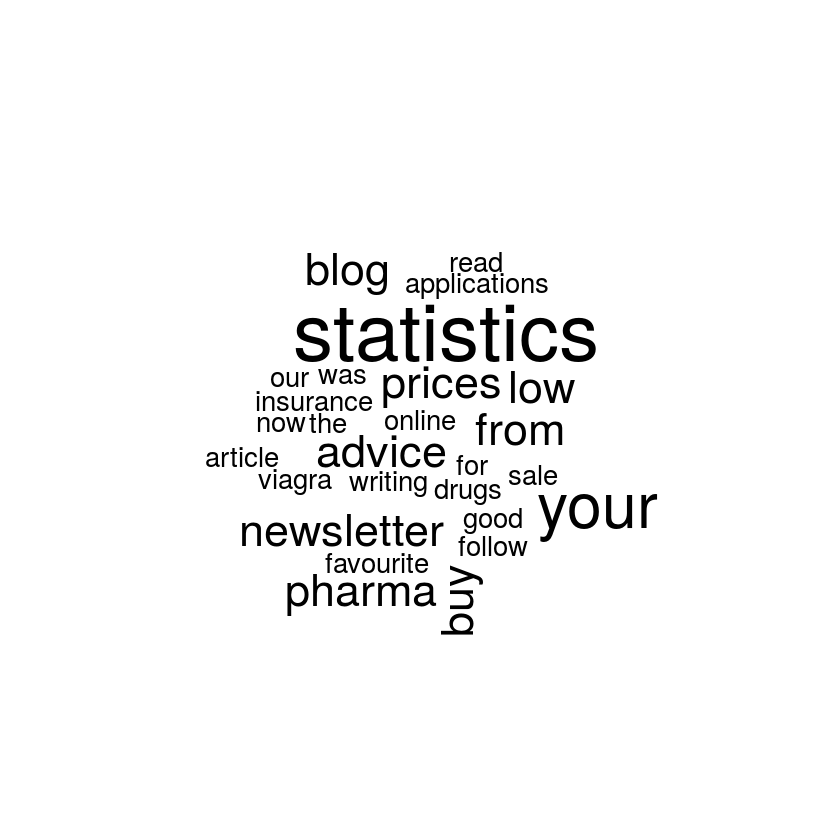

In [101]:
# Zueckerle. wordclouds per class
# All
wordcloud::wordcloud(corpusAll, min.freq = 1)


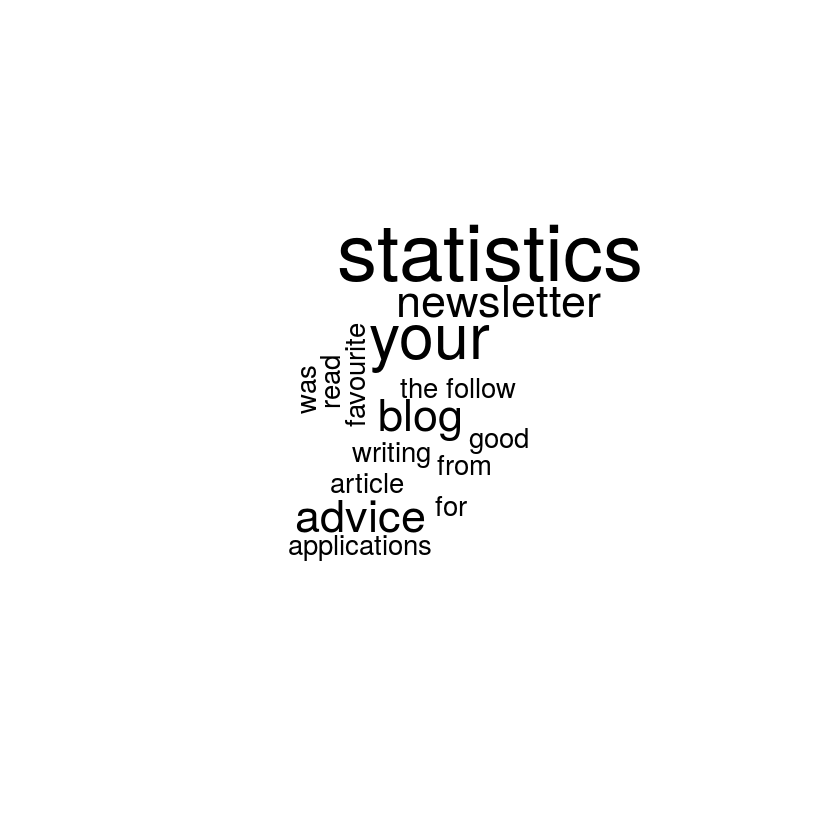

In [102]:
# Ham
wordcloud::wordcloud(corpusHam, min.freq = 1)

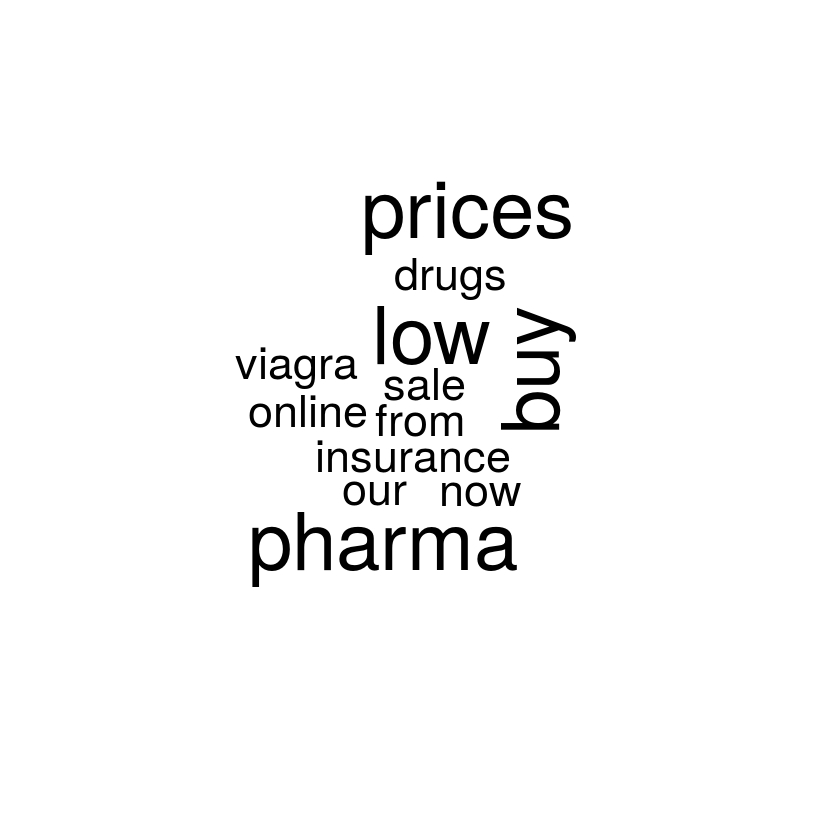

In [103]:
# Spam
wordcloud::wordcloud(corpusSpam, min.freq = 1)

#### Training

In [ ]:
# calculate ingredients
# prioris:
# QUESTION IN ARSNOVA:
#prioriHam = ???
#prioriSpam = ???

In [129]:
# probablity vectors for each class:
# p(occurence word | y = k)
# spam
pSpam = apply(spamMatrix, MARGIN = 2, function(x) sum(x) / nrow(spamMatrix) )
pHam = apply(hamMatrix, MARGIN = 2, function(x) sum(x) / nrow(hamMatrix))
# assign super low values to 0-prob terms: 0.01
pSpam = ifelse(pSpam == 0, 0.01, pSpam)
pHam = ifelse(pHam == 0, 0.01, pHam)

Check the

In [130]:
# check 
pSpam

advice applications      article         blog          buy        drugs 
   0.0100000    0.0100000    0.0100000    0.0100000    0.6666667    0.3333333 
   favourite       follow          for         from         good    insurance 
   0.0100000    0.0100000    0.0100000    0.3333333    0.0100000    0.3333333 
         low   newsletter          now       online          our       pharma 
   0.6666667    0.0100000    0.3333333    0.3333333    0.3333333    0.6666667 
      prices         read         sale   statistics          the       viagra 
   0.6666667    0.0100000    0.3333333    0.0100000    0.0100000    0.3333333 
         was      writing         your 
   0.0100000    0.0100000    0.0100000

In [131]:
# function that calculates posteriori per class
scoreClass = function(test, probVector, prior) {
  # transform to document term matrix (vector)
  testMatrix = as.data.frame(as.matrix(tm::DocumentTermMatrix(tm::VCorpus(tm::VectorSource(test)))))

  # calculate p(word occurence | y = k) for each word in test, remove NAs and multiply them
  # multiply with prior value, this is our posteriori
  return(round(prior * prod(probVector[names(testMatrix)], na.rm = TRUE), 6))
}

# wrapper for both cases
classifySpamNaive = function(testMail, pSpam, pHam, prioriSpam, prioriHam, output = "class") {

  # calculate posterioris
  postSpam = scoreClass(test = testMail, probVector = pSpam, prior = prioriSpam)
  postHam = scoreClass(test = testMail, probVector = pHam, prior = prioriHam)

  # classify
  class = if (postSpam > postHam) {
    class = "spam"
  } else {
    class = "ham"
  }

  # return results
  if (output == "class") {
    return(class)
  } else if (output == "probs") {
    return(list(c(postSpam = postSpam, postHam = postHam, 
                  class = class)))
  }
}

#### Test and evaluate

In [132]:
# Test on "real world data"

testMail = "buy now online low price insurance"
classifySpamNaive(testMail = testMail, pSpam = pSpam, pHam = pHam,
  prioriSpam = prioriSpam, prioriHam = prioriHam, output = "probs")

testMail = "buy drug based pharma insurance online"
classifySpamNaive(testMail = testMail, pSpam = pSpam, pHam = pHam,
  prioriSpam = prioriSpam, prioriHam = prioriHam, output = "probs")

testMail = "good article for your statistics newsletter"
classifySpamNaive(testMail = testMail, pSpam = pSpam, pHam = pHam,
  prioriSpam = prioriSpam, prioriHam = prioriHam, output = "probs")

testMail = "Lorem ipsum dolor sit amet consectetur"
classifySpamNaive(testMail = testMail, pSpam = pSpam, pHam = pHam,
  prioriSpam = prioriSpam, prioriHam = prioriHam, output = "probs")

testMail = "Lorem ipsum dolor sit statistics consectetur"
classifySpamNaive(testMail = testMail, pSpam = pSpam, pHam = pHam,
  prioriSpam = prioriSpam, prioriHam = prioriHam, output = "probs")

[[1]]
  postSpam    postHam      class 
"0.006173"        "0"     "spam"

[[1]]
  postSpam    postHam      class 
"0.018519"        "0"     "spam"

[[1]]
 postSpam   postHam     class 
      "0" "0.00096"     "ham"

[[1]]
postSpam  postHam    class 
 "0.375"  "0.625"    "ham"

[[1]]
 postSpam   postHam     class 
"0.00375"     "0.5"     "ham"

# 5. Different decision boundaries via mlr

We use the __mlr__ package to visualize the decision boundaries of different classifiers on the __spiral task__ from mlbench package.

This synthetic data set looks like this:

x.1,x.2,classes
0.1242744,-0.304929002,2
0.2712096,0.019774584,1
0.3585110,0.001921915,1
0.6777956,0.303582759,2
0.3457861,0.015062034,1
0.2466235,0.047263272,1


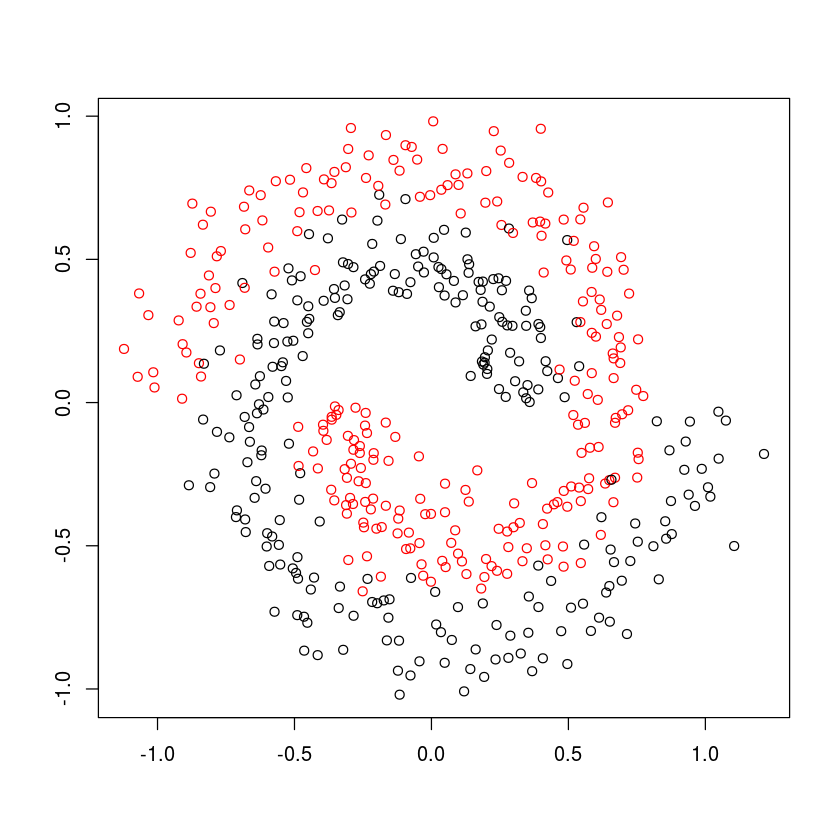

In [27]:
library(mlbench)
library(mlr)
library(BBmisc)

set.seed(123L)

mydata1 = mlbench.spirals(n = 500, sd = 0.1)
mydata2 = as.data.frame(mydata1)

head(mydata2)
plot(mydata1)


#### Comparison of the classifiers

Loading required package: kknn


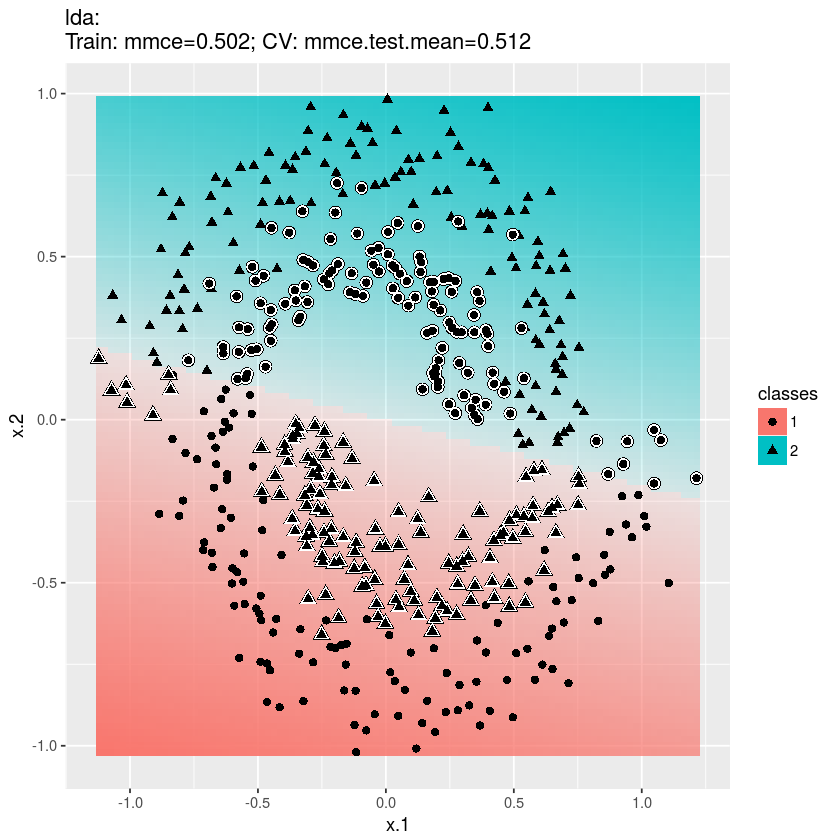

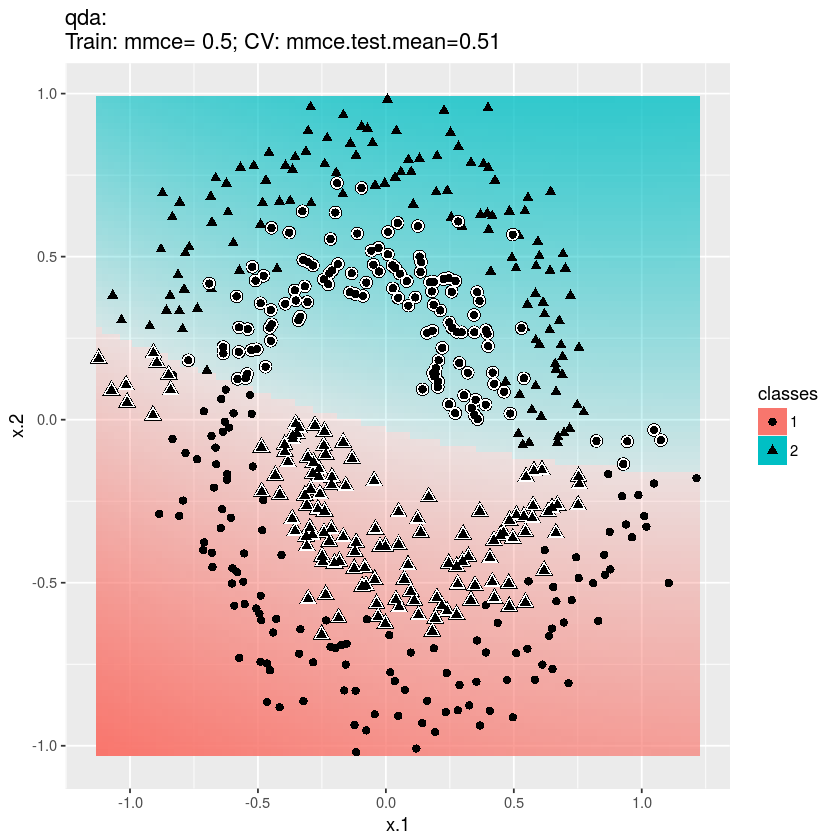

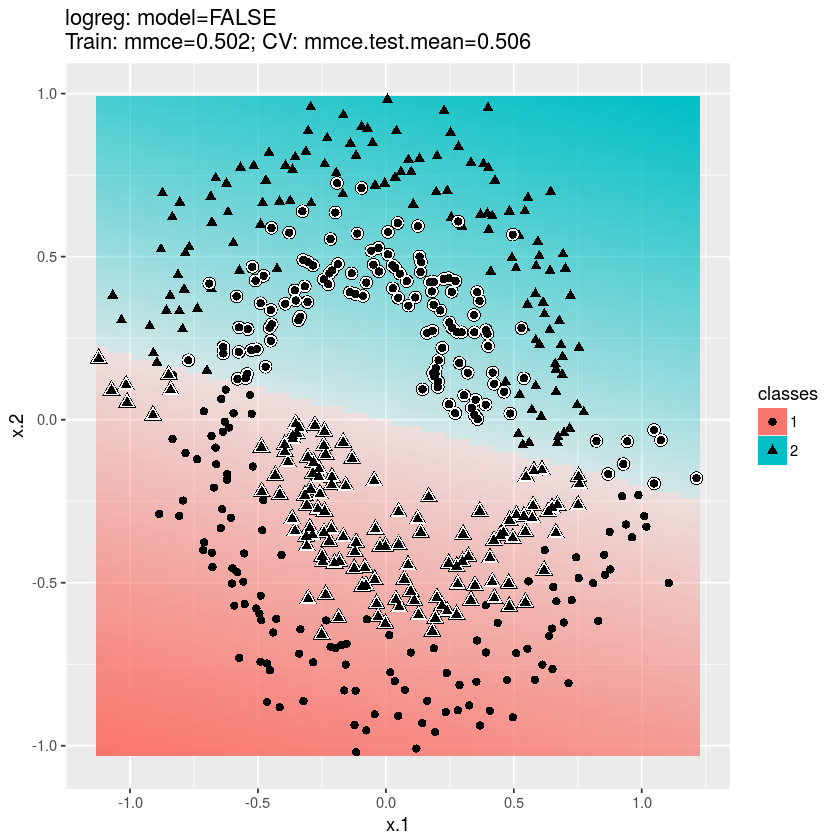

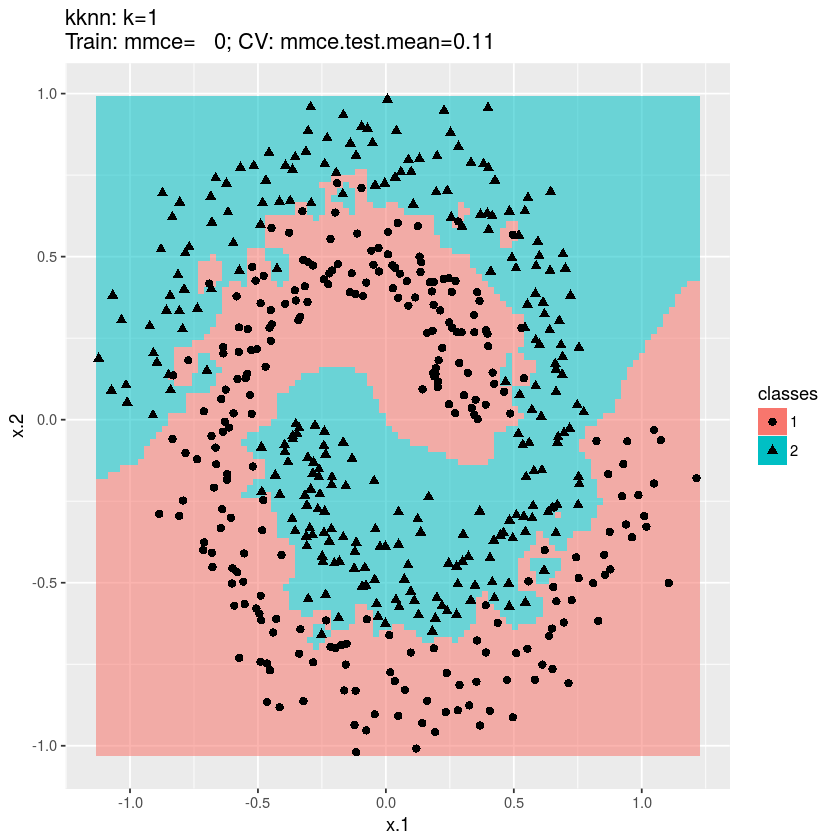

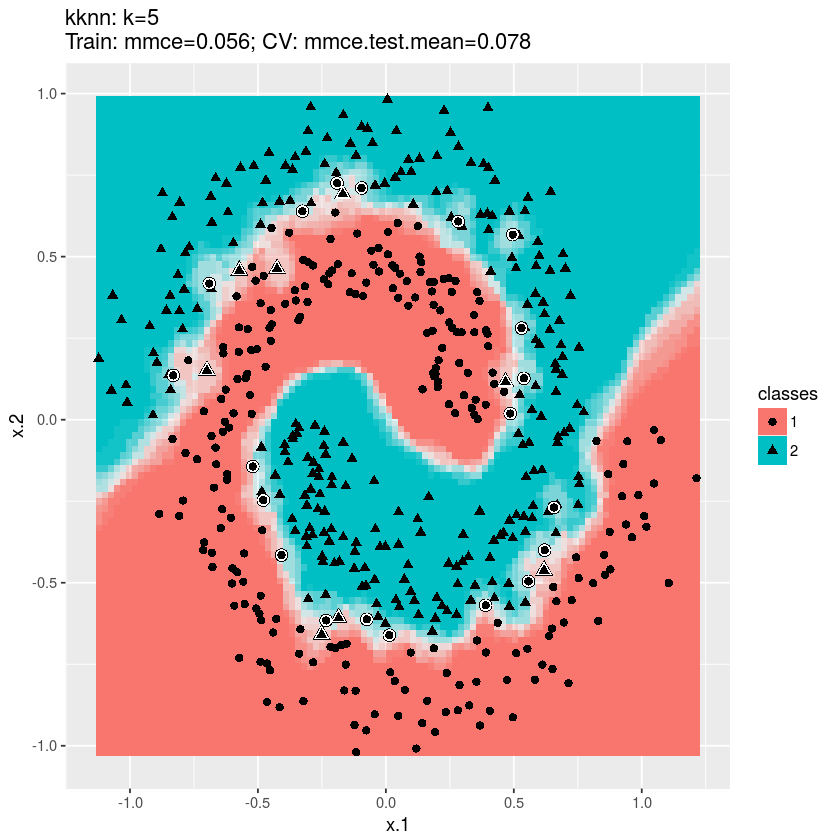

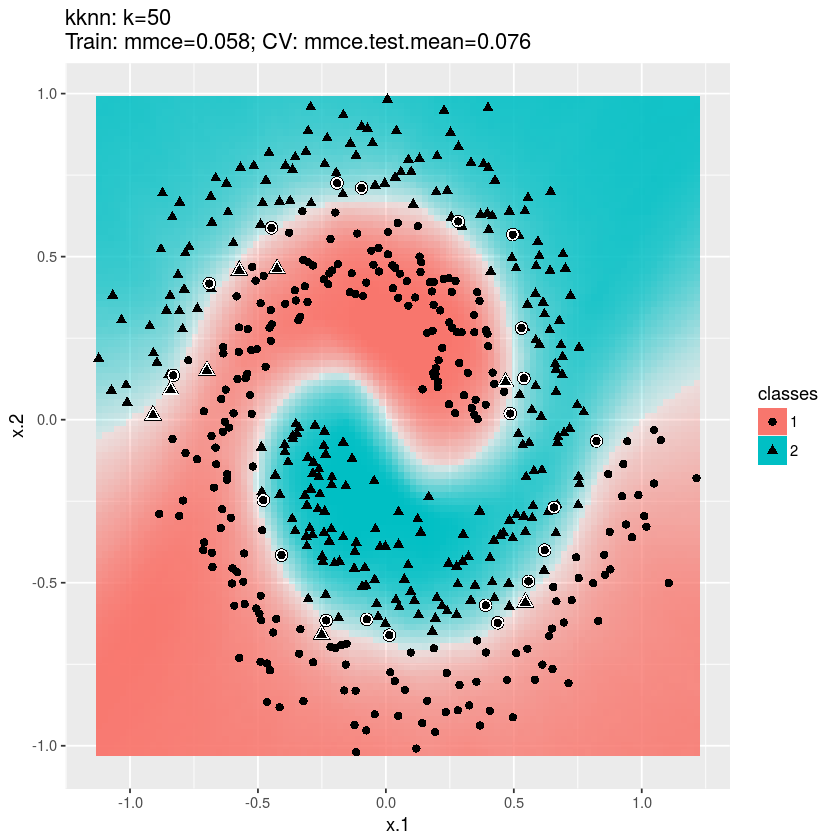

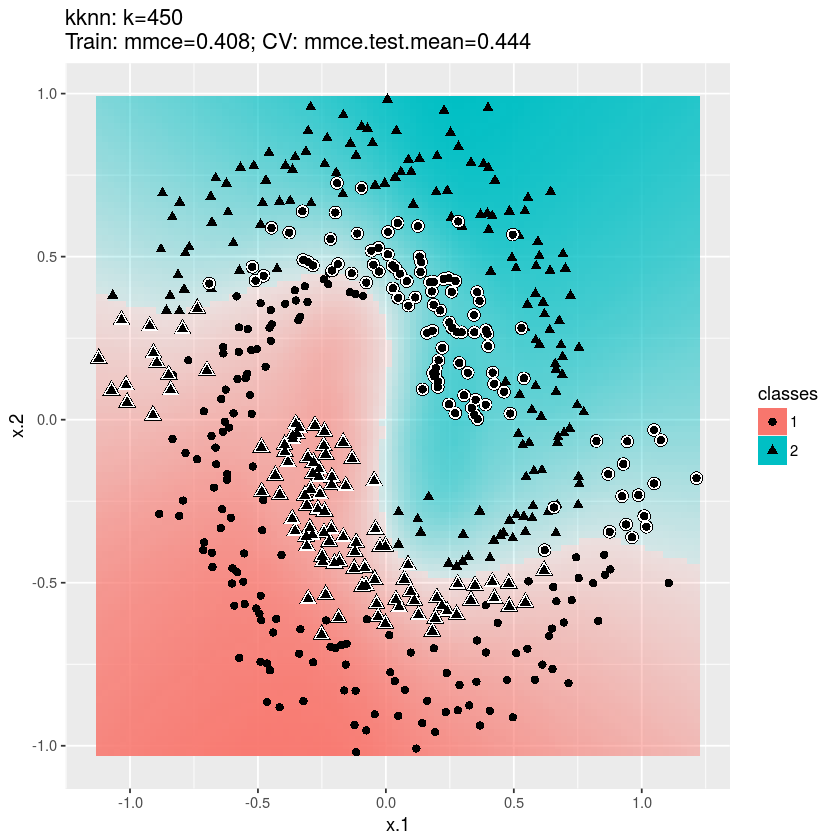

In [28]:
task = makeClassifTask(data = mydata2, target = "classes")

lrn = makeLearner("classif.kknn")

myplot = function(learner, par.vals) {
  for (j in seq_row(par.vals)) {
    learner = setHyperPars(learner, par.vals = as.list(par.vals[j, , drop = FALSE]))
    pl = plotLearnerPrediction(learner, task)
    print(pl)
    pause()
  }
}


plotLearnerPrediction("classif.lda", task)
plotLearnerPrediction("classif.qda", task)
plotLearnerPrediction("classif.logreg", task)

myplot(
  learner = makeLearner("classif.kknn"),
  par.vals = data.frame(k = c(1, 5, 50, 450))
)